In [292]:
%reset

In [348]:
import numpy as np
import pandas as pd
 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.metrics import mutual_info_score

In [294]:
#load data 
df = pd.read_csv('/home/bmatore/projects/mlbookcamp-code/data/housing.csv')

In [295]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0,...,11.0,15.0,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0,...,2640.0,2655.0,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0,...,505.0,493.0,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0,1206.0,1551.0,...,1257.0,1200.0,1047.0,1082.0,1041.0,845.0,356.0,1007.0,741.0,1387.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0,595.0,714.0,...,445.0,432.0,385.0,382.0,344.0,330.0,114.0,433.0,349.0,530.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0,226700.0,261100.0,...,112000.0,107200.0,115600.0,98300.0,116800.0,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,...,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND


In [296]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [297]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [298]:
df = df.fillna(0)

In [299]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
df['median_house_value'].describe()

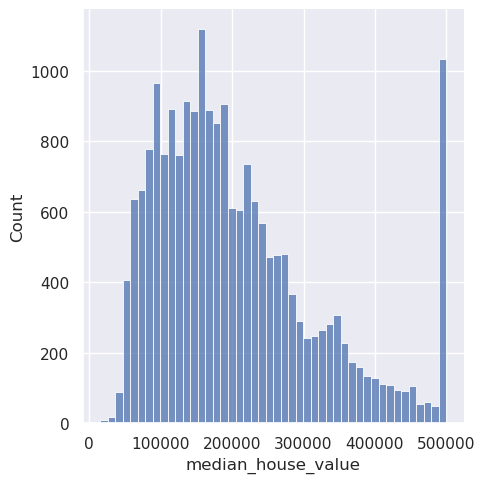

In [300]:
sns.displot(df['median_house_value'], kde = True)

In [ ]:
sns.boxplot(df['median_house_value'])

In [ ]:
#pShapiro-Wilk test for normality

from scipy.stats import shapiro 

shapiro(df.median_house_value)

In [301]:
df[['ocean_proximity', 'total_bedrooms']].groupby('ocean_proximity').agg(['count','mean'])

total_bedrooms            
                         count        mean
ocean_proximity                           
<1H OCEAN                 9136  540.437281
INLAND                    6551  529.399328
ISLAND                       5  420.400000
NEAR BAY                  2290  509.692140
NEAR OCEAN                2658  532.536494

In [302]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [303]:
mdv_mean = np.mean(df.median_house_value)
mdv_mean

206855.81690891474

In [304]:
df['above_average'] = np.where(df['median_house_value'] > mdv_mean, 1, 0)

In [305]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household', 'above_average'],
      dtype='object')

In [306]:
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
above_average                 int64
dtype: object

In [307]:
df['ocean_proximity'].nunique()

5

In [308]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [309]:
del df['median_house_value']

In [310]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'above_average'],
      dtype='object')

In [311]:
X = df.iloc[:, df.columns != 'above_average'].values
y = df.iloc[:, df.columns == 'above_average'].values

In [312]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [313]:
print(X)

[[0.0 0.0 0.0 ... 6.984126984126984 0.14659090909090908
  2.5555555555555554]
 [0.0 0.0 0.0 ... 6.238137082601054 0.15579659106916466 2.109841827768014]
 [0.0 0.0 0.0 ... 8.288135593220339 0.12951601908657123
  2.8022598870056497]
 ...
 [0.0 1.0 0.0 ... 5.20554272517321 0.21517302573203195 2.325635103926097]
 [0.0 1.0 0.0 ... 5.329512893982808 0.21989247311827956
  2.1232091690544412]
 [0.0 1.0 0.0 ... 5.254716981132075 0.22118491921005387 2.616981132075472]]


In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42) 

In [315]:
len(df)

20640

In [316]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(12384, 16)
(4128, 16)
(4128, 16)


In [317]:
print(y)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [318]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'above_average'],
      dtype='object')

<AxesSubplot:>

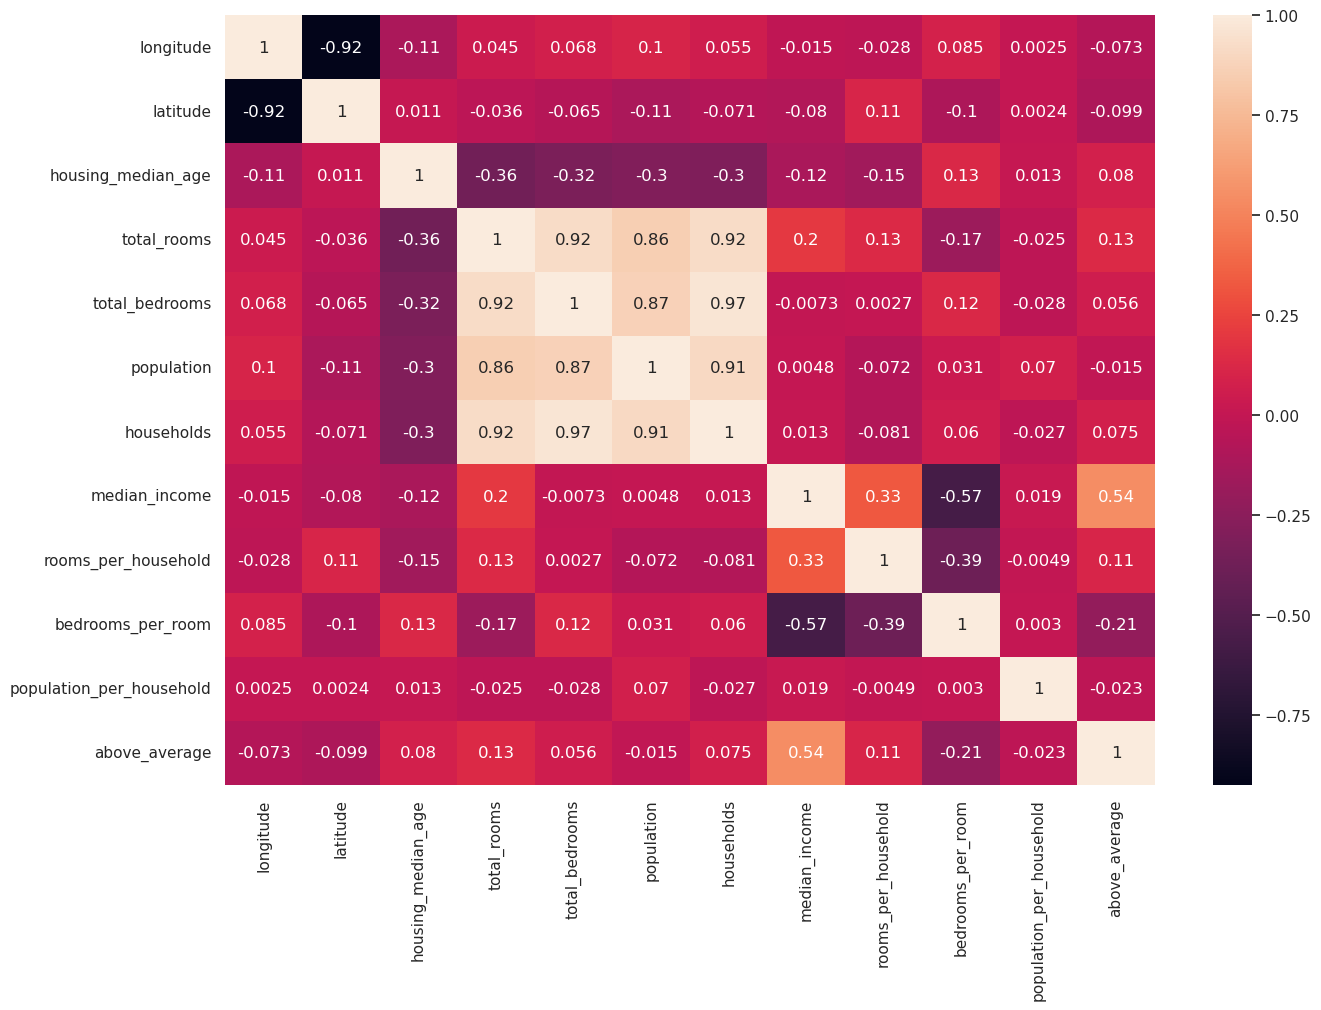

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [320]:
mi_score = round(mutual_info_score(df.above_average, df.ocean_proximity),2)
mi_score

0.1

In [321]:
X_train.shape

(12384, 16)

In [322]:
X_test.shape

(4128, 16)

In [323]:
X_val.shape

(4128, 16)

In [324]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

/home/bmatore/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [325]:
model.intercept_[0]

-0.25075258353081115

In [326]:
model.coef_[0].round(3)

array([ 0.411, -1.754,  0.078,  0.235,  0.779,  0.086,  0.113,  0.036,
       -0.   ,  0.002, -0.002,  0.004,  1.214, -0.004,  0.744,  0.01 ])

In [327]:
y_pred_test = model.predict(X_test)

In [335]:
y_pred = model.predict(X_val)

In [330]:
y_pred_val = model.predict_proba(X_val)
y_pred_val

array([[0.92067521, 0.07932479],
       [0.8281322 , 0.1718678 ],
       [0.04768853, 0.95231147],
       ...,
       [0.03883634, 0.96116366],
       [0.1485076 , 0.8514924 ],
       [0.53164195, 0.46835805]])

In [340]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[2110  333]
 [ 345 1340]]


0.8357558139534884

In [337]:
df_pred = pd.DataFrame()
df_pred['hprediction'] = y_pred
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.hprediction == df_pred.actual

In [338]:
df_pred

,hprediction,actual,correct
0,0,0,True
1,0,0,True
2,1,1,True
3,0,1,False
4,1,1,True
...,...,...,...
4123,0,0,True
4124,1,1,True
4125,1,1,True
4126,1,1,True


In [339]:
df_pred.correct.mean()

0.8357558139534884

In [ ]:
score = model.score(X_val, y_val)
print(score)

0.8357558139534884


In [ ]:
importance = model.coef_[0]

In [ ]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.41114
Feature: 1, Score: -1.75353
Feature: 2, Score: 0.07761
Feature: 3, Score: 0.23525
Feature: 4, Score: 0.77877
Feature: 5, Score: 0.08604
Feature: 6, Score: 0.11346
Feature: 7, Score: 0.03575
Feature: 8, Score: -0.00013
Feature: 9, Score: 0.00166
Feature: 10, Score: -0.00164
Feature: 11, Score: 0.00412
Feature: 12, Score: 1.21386
Feature: 13, Score: -0.00396
Feature: 14, Score: 0.74443
Feature: 15, Score: 0.01049


In [ ]:
features = ['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN','longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']

In [ ]:
dict(zip(features,model.coef_[0].round(5)))

{'<1H OCEAN': 0.41114,
 'INLAND': -1.75353,
 'ISLAND': 0.07761,
 'NEAR BAY': 0.23525,
 'NEAR OCEAN': 0.77877,
 'longitude': 0.08604,
 'latitude': 0.11346,
 'housing_median_age': 0.03575,
 'total_rooms': -0.00013,
 'total_bedrooms': 0.00166,
 'population': -0.00164,
 'households': 0.00412,
 'median_income': 1.21386,
 'rooms_per_household': -0.00396,
 'bedrooms_per_room': 0.74443,
 'population_per_household': 0.01049}

In [ ]:
df_linear = pd.read_csv('/home/bmatore/projects/mlbookcamp-code/data/housing.csv')

In [ ]:
df_linear.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df_linear = df_linear.fillna(0)

In [ ]:
df_linear.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df_linear['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
df_linear['median_house_value'] = np.log1p(df_linear.median_house_value.values)

In [ ]:
df_linear['median_house_value'].describe()

count    20640.000000
mean        12.084891
std          0.569131
min          9.615805
25%         11.691916
50%         12.099050
75%         12.486451
max         13.122367
Name: median_house_value, dtype: float64

In [ ]:
X = df_linear.iloc[:, df_linear.columns != 'median_house_value'].values
y = df_linear.iloc[:, df_linear.columns == 'median_house_value'].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42) 

In [347]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

coefs = []
rmse  = []
alphas = [0, 0.01, 0.1, 1, 10]

for a in alphas:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val) 
    coefs.append(model.coef_)
    rmse.append(mean_squared_error(y_val, y_pred))
    print(a,rmse)

0 [0.20568623410795533]
0.01 [0.20568623410795533, 0.20568623411576348]
0.1 [0.20568623410795533, 0.20568623411576348, 0.2056862341899341]
1 [0.20568623410795533, 0.20568623411576348, 0.2056862341899341, 0.20568623493554503]
10 [0.20568623410795533, 0.20568623411576348, 0.2056862341899341, 0.20568623493554503, 0.205686242379941]
